In [1]:
from typing import *
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

from smol_yolo.util.bbox import rel_xywh_to_abs_min_max

In [12]:
DATASET_ROOT = Path("~/data/coco128").expanduser()

In [4]:
def jpg_to_label(img_path: Path) -> Path:
    path_str = img_path.as_posix()
    label_path_str = path_str.replace("images", "labels").replace(".jpg", ".txt")
    return Path(label_path_str)

def parse_row(row: str) -> Tuple[int, float, float, float, float]:
    label, x, y, w, h = row.split(" ")
    return (int(label), float(x), float(y), float(w), float(h))

In [13]:
image_paths = sorted(DATASET_ROOT.glob("**/*.jpg"))
label_paths = [jpg_to_label(p) for p in image_paths]

In [14]:
def load_i(i: int, image_paths: List[Path], label_paths: List[Path]) -> Tuple[np.ndarray, List[tuple]]:
    img_path = image_paths[i]
    label_path = label_paths[i]
    img_bgr = cv2.imread(img_path.as_posix())
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    label_lines = label_path.read_text().splitlines()
    labels = [parse_row(row) for row in label_lines if row]
    return img_rgb, labels

In [62]:
I = np.random.randint(0, len(image_paths))
img_rgb, labels = load_i(I, image_paths, label_paths)

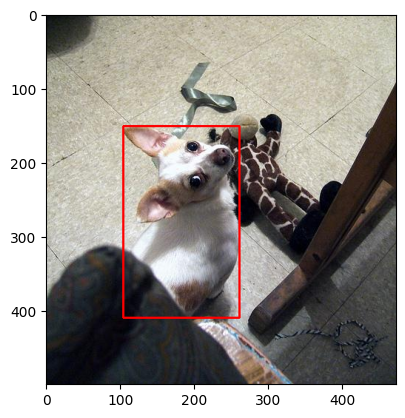

In [63]:
hw = img_rgb.shape[:2]
for label, x, y, w, h in labels:
    x1,y1,x2,y2 = rel_xywh_to_abs_min_max(x, y, w, h, hw)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(img_rgb)